<a href="https://colab.research.google.com/github/liege1997/Sign-Language-Recognition/blob/main/silar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Silar - Sign Language Recognition

**Initial methods to import dataset from Kaggle**

import os

os.chdir('/content/drive/MyDrive/Colab Notebooks/ProjectSilar')

os.listdir()

!pip install kaggle

!kaggle datasets download -d ayuraj/american-sign-language-dataset

!unzip -q 'american-sign-language-dataset.zip'

**References:**

https://colab.research.google.com/github/xn2333/OpenCV/blob/master/Image_Processing_in_Python_Final.ipynb#scrollTo=6dy-iP-VTibt

https://developers.google.com/machine-learning/practica/image-classification/convolutional-neural-networks

https://www.tensorflow.org/tutorials/load_data/images

https://www.tensorflow.org/tutorials/images/cnn

In [30]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [ ]:
img_folder="/content/drive/MyDrive/Colab Notebooks/ProjectSilar/asl"
asl_dir = tf.keras.preprocessing.image_dataset_from_directory(img_folder)

Found 25291 files belonging to 36 classes.


In [60]:
img_height = 64
img_width = 64
load_size = 20 #total images per folder

In [61]:
l={'0':0,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,
   'a':10,'b':11,'c':12,'d':13,'e':14,'f':15,'g':16,'h':17,'i':18,'j':19,'k':20,'l':21,'m':22,
   'n':23,'o':24,'p':25,'q':26,'r':27,'s':28,'t':29,'u':30,'v':31,'w':32,'x':33,'y':34,'z':35}

In [62]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/ProjectSilar/asl')

image_data=[]
class_labels=[]

for folder_name in os.listdir():
  folder_path = os.path.join(os.getcwd(),folder_name)
  for imgs in os.listdir(folder_path)[:load_size]:
    img_path=os.path.join(folder_path,imgs)
    image=cv2.imread(img_path) 
    image=cv2.resize(image,(img_width,img_height))
    image=np.asarray(image)
    image = image.astype('float32')
    image /= 255 #to range 0-1
    image_data.append(image)
    class_labels.append(l[folder_name])

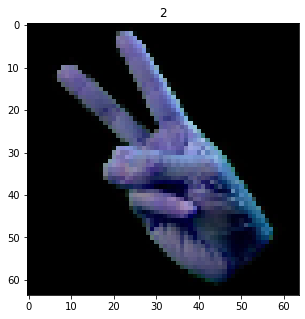

In [63]:
plt.figure(figsize=(10,5))
plt.title(class_labels[50])
plt.imshow(image_data[50])

In [96]:
X=np.array(image_data)
#Y=np.array(to_categorical(class_labels))
Y=np.array(class_labels)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=11)

In [98]:
Y.shape

(720,)

In [66]:
nRows,nCols,nDims = X.shape[1:]
input_shape = (nRows, nCols, nDims)
nClasses=len(l)

In [67]:
def createModel():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    #model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    #model.add(Conv2D(32, (3, 3), activation='relu'))
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
    
    return model

In [68]:
model1 = createModel()
batch_size = 256
epochs = 100
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model1.summary()

In [69]:
history = model1.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(X_test, y_test))
model1.evaluate(X_test, y_test)

Epoch 1/100
3/3 [==============================] - 7s 1s/step - loss: 4.1052 - accuracy: 0.0266 - val_loss: 3.5807 - val_accuracy: 0.0347
Epoch 2/100
3/3 [==============================] - 1s 179ms/step - loss: 3.5661 - accuracy: 0.0349 - val_loss: 3.5732 - val_accuracy: 0.0139
Epoch 3/100
3/3 [==============================] - 1s 183ms/step - loss: 3.4911 - accuracy: 0.0597 - val_loss: 3.8720 - val_accuracy: 0.0764
Epoch 4/100
3/3 [==============================] - 1s 178ms/step - loss: 3.5951 - accuracy: 0.0860 - val_loss: 3.2887 - val_accuracy: 0.1597
Epoch 5/100
3/3 [==============================] - 1s 173ms/step - loss: 3.0319 - accuracy: 0.1621 - val_loss: 3.0664 - val_accuracy: 0.1042
Epoch 6/100
3/3 [==============================] - 1s 184ms/step - loss: 2.8023 - accuracy: 0.2754 - val_loss: 2.6973 - val_accuracy: 0.2292
Epoch 7/100
3/3 [==============================] - 1s 179ms/step - loss: 2.2754 - accuracy: 0.3600 - val_loss: 2.1873 - val_accuracy: 0.3472
Epoch 8/100
3/3 

[2.8621137142181396, 0.7222222089767456]

5/5 - 0s - loss: 2.8621 - accuracy: 0.7222


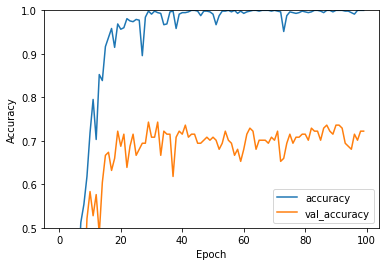

In [76]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model1.evaluate(X_test, y_test, verbose=2)


In [99]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [100]:
model.summary()


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 29, 29, 64)        36928     
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


In [106]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(36))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, 
                    validation_data=(X_test, y_test))


Epoch 1/100
18/18 [==============================] - 1s 34ms/step - loss: 7.1464 - accuracy: 0.0833 - val_loss: 3.2356 - val_accuracy: 0.1319
Epoch 2/100
18/18 [==============================] - 0s 21ms/step - loss: 2.5823 - accuracy: 0.4253 - val_loss: 2.7514 - val_accuracy: 0.2361
Epoch 3/100
18/18 [==============================] - 0s 19ms/step - loss: 1.6374 - accuracy: 0.5917 - val_loss: 2.2743 - val_accuracy: 0.4097
Epoch 4/100
18/18 [==============================] - 0s 18ms/step - loss: 0.6573 - accuracy: 0.8512 - val_loss: 2.1289 - val_accuracy: 0.5694
Epoch 5/100
18/18 [==============================] - 0s 19ms/step - loss: 0.1308 - accuracy: 0.9854 - val_loss: 2.2722 - val_accuracy: 0.5694
Epoch 6/100
18/18 [==============================] - 0s 19ms/step - loss: 0.0425 - accuracy: 0.9991 - val_loss: 2.3701 - val_accuracy: 0.5556
Epoch 7/100
18/18 [==============================] - 0s 19ms/step - loss: 0.0152 - accuracy: 0.9995 - val_loss: 2.5066 - val_accuracy: 0.5972
Epoch 

5/5 - 0s - loss: 3.4088 - accuracy: 0.6319


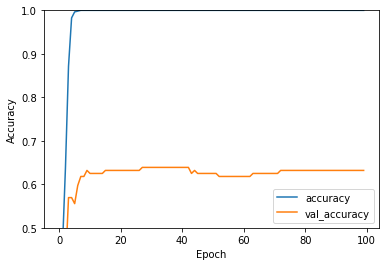

In [107]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

In [108]:
model.predict(X_train[0])

ValueError: ignored